## 1. Proyecto 2.


### 1.1 Probabilidad Precio Umbral.
> Calcularemos 4 diferentes acciones y veremos el rango de precios así como su comportamiento a futuro.

### 1.2 Introducción
> En el siguiente problema analizarames a 4 diferentes compañias de energia para decidir en que debemos de invertir. Debido a la creciente problematica en Israel y Palestina siendo un lugar geográficamente estrategico y el cual importa muchos recursos energéticos por lo cual llego a nuestra atención y decidimos invertir en aquellas empresas, sin embargo, queremos ver cual de ellas es la más adecuada para invertir.


### 1.3 Objetivos.
> - Definir la desviación estandard y la media de cada empresa evaluada.
> - Calcular rendimientos.
> - Simular los precios a futuro.
> #### 1.1 Objetivo general.
>  - Definir cual de los acciones tendrá mayor rendimiento a futuro.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.

In [ ]:
#!conda install -c conda-forge yfinance -y

In [ ]:
#!conda install -c anaconda pandas-datareader -y

In [21]:
# Importamos librerías
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Sobre escribir el método de lectura de pandas-datareader por el de yahoo-finance
yf.pdr_override()

In [6]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    
    if len(tickers) == 1:
        closes = closes.to_frame().copy()
        closes.columns = [tickers]
    return closes

In [7]:
# Descargamos datos...
names = ['DVN', 'EOG','MRO','CPE']
start = '2022-10-16'
end = '2023-10-16'

precios = get_adj_closes(names, start, end)
precios.head()

[*********************100%%**********************]  4 of 4 completed


,CPE,DVN,EOG,MRO
Date,,,,
2022-10-17,42.060001,65.500938,115.339127,26.745363
2022-10-18,41.820000,65.472778,118.286995,27.159256
2022-10-19,42.230000,67.509132,124.087349,27.937769
2022-10-20,41.930000,67.265144,125.537422,27.819511
2022-10-21,43.900002,69.714394,128.790604,28.726135


<Axes: xlabel='Date'>

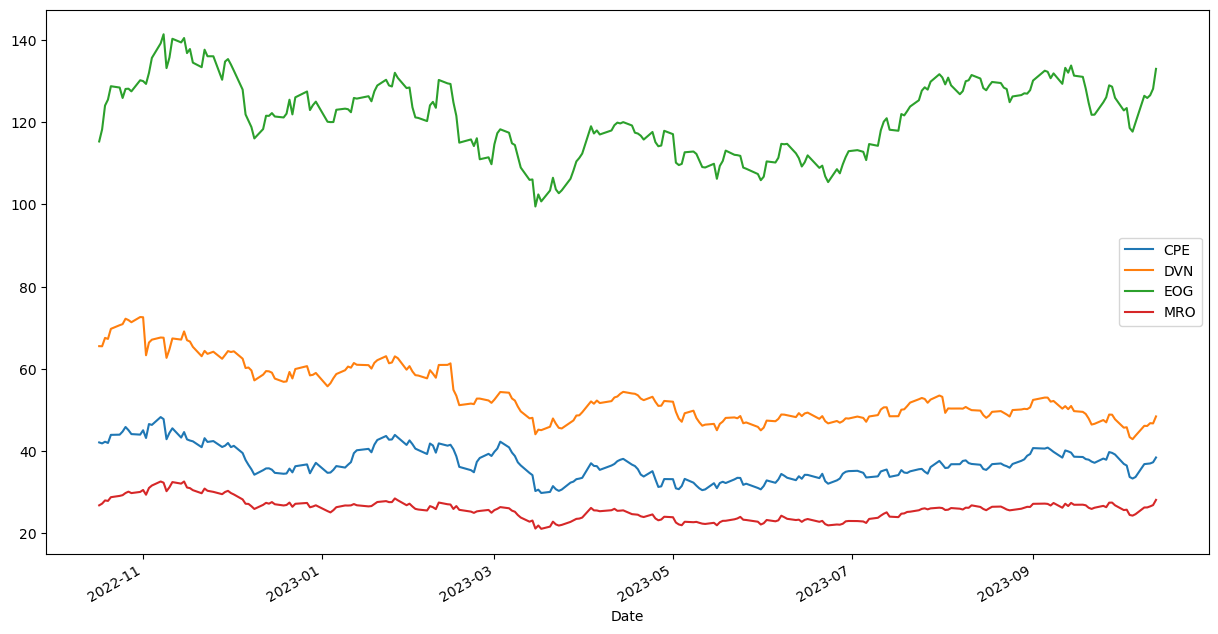

In [8]:
# Graficamos
precios.plot(figsize=(15,8))

<Axes: title={'center': 'rendimientos simples'}, xlabel='Date'>

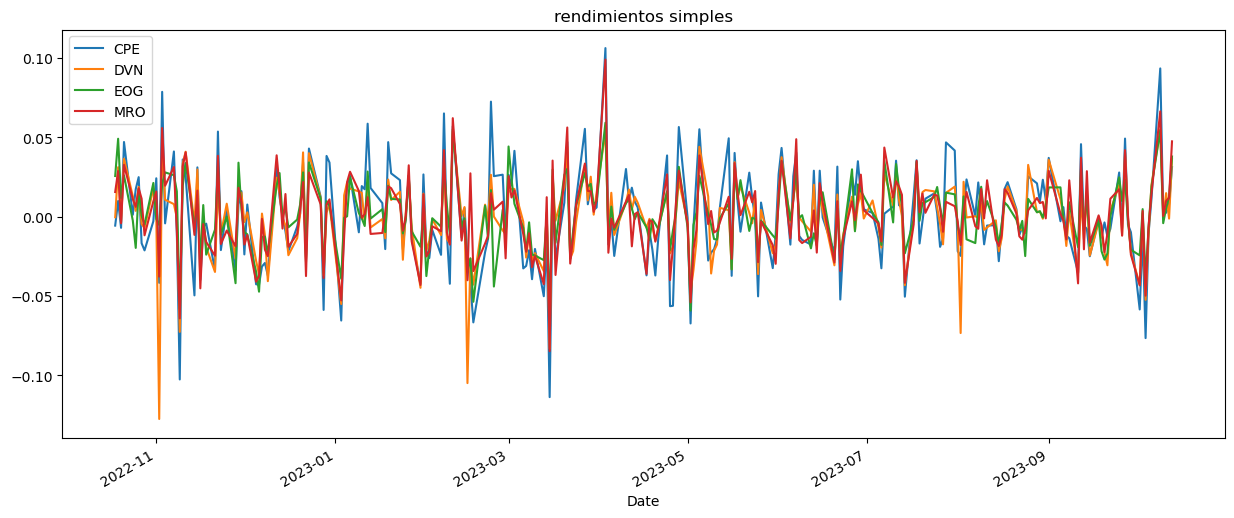

In [9]:
ret = precios.pct_change()
ret.plot(figsize=(15, 6), title='rendimientos simples')

In [10]:
# Calculamos media y desviación estándar
mu_DVN = ret['DVN'].mean()

std_DVN = ret['DVN'].std()

In [11]:
N = 365
# Función que simula varios escenarios de rendimientos diarios
def sim_rend(mu, std, ndays, nscen, start_date):
    
    # Generar el rango de fechas en las que se realizará la predicción (freq='B' días laborales)
    fechas = pd.date_range(start_date, periods=ndays, freq='B')
    
    # Generar la predicción asumiendo que los rendimientos siguen una distribución normal (gaussiana)
    datos = std*np.random.randn(ndays, nscen) + mu
    
    # Generar un dataframe (tabla) con los resultados
    rendimientos_simulados = pd.DataFrame(datos, index=fechas)
    
    return rendimientos_simulados

Obtendremos los datos de **Devon Energy Corporatión(DVN)**

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\

<Axes: >

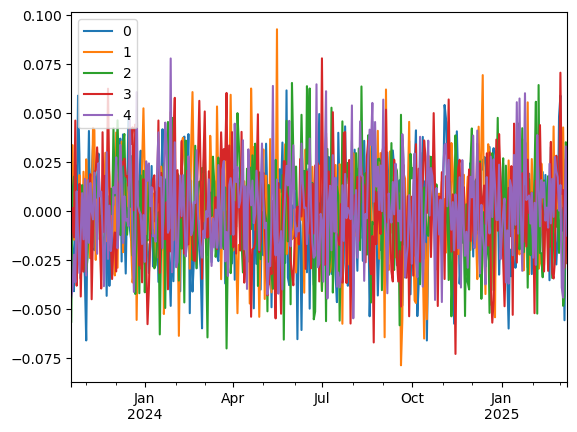

In [22]:
pd.DataFrame(std_DVN * np.random.randn(N,5) + mu_DVN, 
             index=pd.date_range('2023-10-17', periods=N, freq='B')).plot()

In [14]:
ndays = 365
nscen = 100
start_date = '2023-10-17'

rend_simu_DVN = sim_rend(mu_DVN, std_DVN, ndays, nscen, start_date)
#rend_simu_DVN

#rend_simu_DVN.iloc[:, 0].plot(figsize=(15,8), legend=False)

In [23]:
precios['DVN'][-3]

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\69676373.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios['DVN'][-3]


46.75

In [24]:
precios_simulados_DVN = precios['DVN'][-3]*(1+rend_simu_DVN).cumprod(axis=0)
precios_simulados_DVN

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\657686014.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios_simulados_DVN = precios['DVN'][-3]*(1+rend_simu_DVN).cumprod(axis=0)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2023-10-17,46.749447,47.500713,47.609453,46.518743,47.073121,46.494657,46.294585,48.743915,48.042236,46.853922,...,45.229671,45.959981,47.065280,46.793995,48.136342,44.861240,48.555700,45.929592,47.099788,46.609260
2023-10-18,46.963396,47.844330,47.068340,46.408372,48.250225,48.359145,47.450567,49.434334,47.385006,46.116687,...,44.305021,46.754837,47.897491,47.321501,47.695412,43.408449,50.090279,48.187449,46.193008,48.504814
2023-10-19,46.824173,47.391917,48.115266,46.739193,50.012979,48.228717,48.351305,48.062376,46.461241,45.361009,...,44.904739,46.418416,46.704762,47.561301,47.756289,45.193775,51.124781,46.868942,47.715148,49.846448
2023-10-20,46.440157,49.361025,49.819241,47.471350,49.403969,48.162714,46.591826,48.817816,44.660868,44.720843,...,44.627646,47.133708,46.624993,48.793942,47.404408,45.534173,50.660254,45.049295,46.786204,48.413600
2023-10-23,47.636798,49.840010,49.948696,47.848351,48.551446,49.189863,47.118154,50.277430,44.694979,45.631087,...,45.275294,46.260280,50.565797,47.431952,49.935232,45.555090,50.566616,46.627649,47.556675,47.725085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,47.023878,23.046126,23.992653,15.926335,65.032335,36.963738,28.587248,36.543722,14.944358,38.742777,...,28.212820,27.519771,22.431562,9.621433,21.025378,64.064391,22.191957,40.025154,30.386837,78.099794
2025-03-05,46.891973,24.001651,24.538253,16.451666,63.269654,37.764450,28.373232,36.835532,15.047567,38.175307,...,28.580754,26.293832,22.658714,9.596475,20.249398,63.451944,22.716224,39.310288,30.303226,81.321713
2025-03-06,44.879146,23.320099,24.074628,15.833334,66.747735,38.729315,29.159375,35.266076,14.629256,38.517485,...,28.653832,26.280919,23.287274,9.571498,19.747998,63.929160,22.068616,39.527729,29.976917,81.490340
2025-03-07,45.153186,22.980279,23.799594,16.008994,64.721530,38.490835,28.513770,34.733888,14.195400,38.952794,...,29.557711,26.161031,23.737510,8.788752,20.591797,63.083410,23.159350,40.136591,30.435337,82.216808


In [25]:
# Umbral de 110% del ultimo precio
umbral = (1.1)*(precios['DVN'][-3])

# Fechas
dates = precios_simulados_DVN.index

umbral

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\1869949591.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  umbral = (1.1)*(precios['DVN'][-3])


51.425000000000004

In [18]:
TFD = precios_simulados_DVN>=umbral

In [19]:
# Instrumento: 
names = ['DVN']

# Fechas de interés (inicio y fin): 
start = '2022-10-16'
end = '2023-10-16'

# Función DataReader
precios_reales = get_adj_closes(names, start, end)

[*********************100%%**********************]  1 of 1 completed


C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-pack

<Axes: xlabel='Date'>

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\ticker.py:218: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return [self(value, i) for i, value in enumerate(values)]


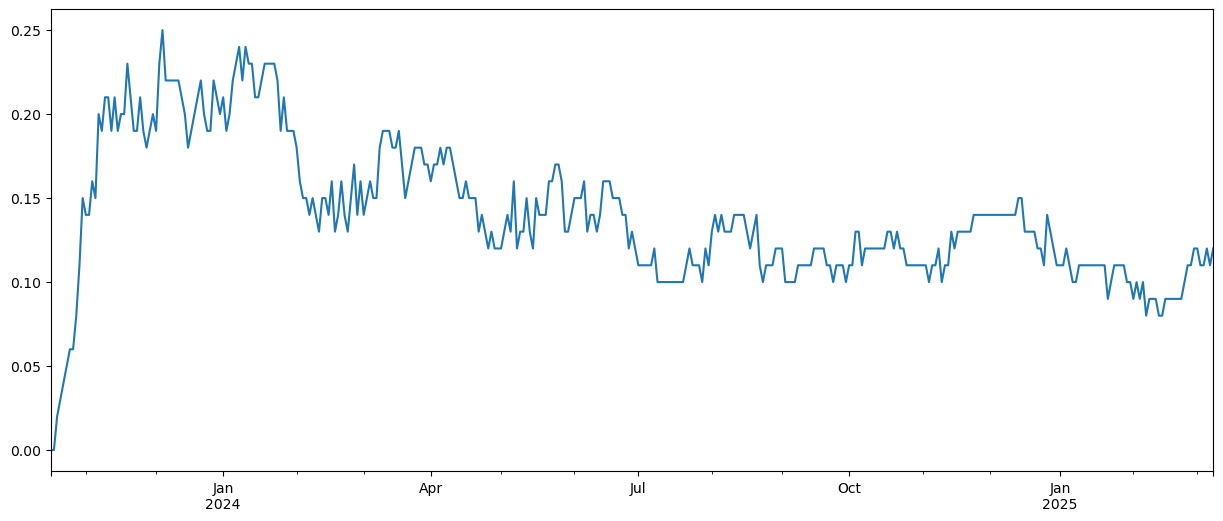

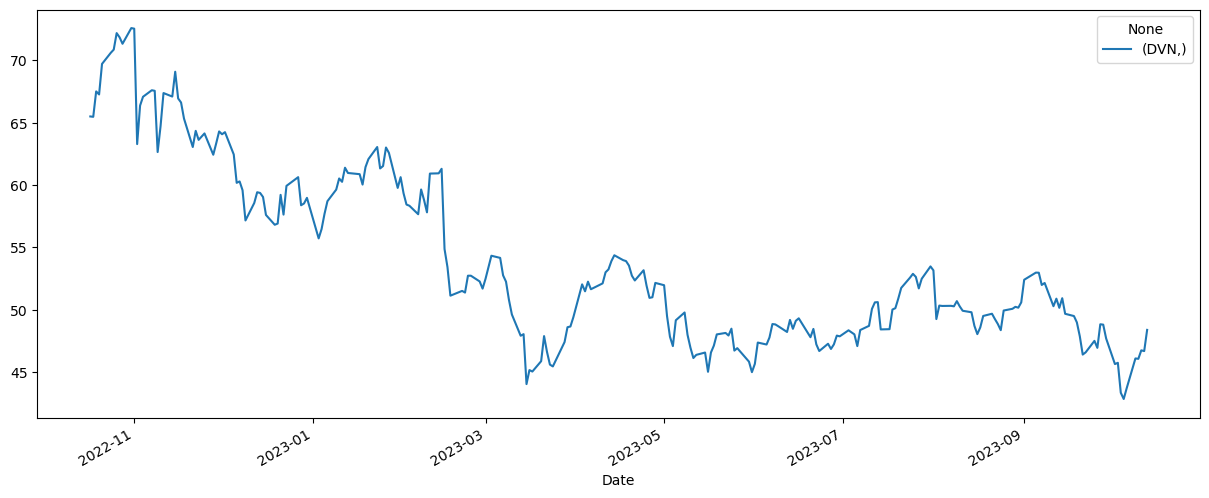

In [26]:
# Comparar cada escenario en cada fecha
TFD = precios_simulados_DVN>=umbral

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = TFD.sum(axis=1)/nscen

# Gráfico de probabilidad
prob.plot(figsize=(15, 6), legend=False)

#Grafico de los datos hasta el momento
precios_reales.plot(figsize=(15, 6))

Obtendremos los datos simulados de **EOG Resources, Inc(EOG)**

In [27]:
#Calculamos media y desviacion estandard
mu_EOG = ret['EOG'].mean()

std_EOG = ret['EOG'].std()

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\

<Axes: >

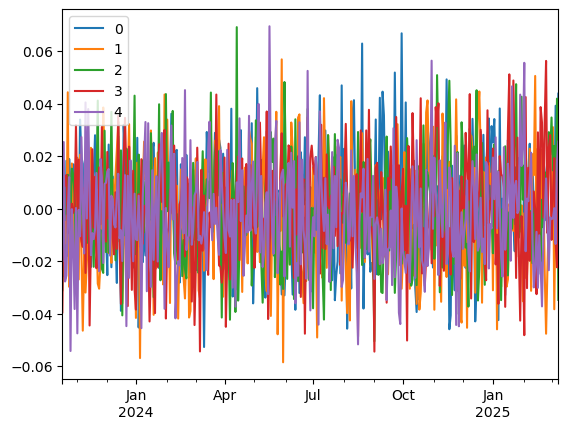

In [28]:
pd.DataFrame(std_EOG * np.random.randn(N,5) + mu_EOG, 
             index=pd.date_range('2023-10-17', periods=N, freq='B')).plot()

In [29]:
ndays = 365
nscen = 100
start_date = '2023-10-17'

rend_simu_EOG = sim_rend(mu_EOG, std_EOG, ndays, nscen, start_date)
#rend_simu_EOG

#rend_simu_EOG.iloc[:, 0].plot(figsize=(15,6), legend=False)

In [30]:
precios['EOG'][-1]

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\3043133108.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios['EOG'][-1]


133.01499938964844

In [31]:
precios_simulados_EOG = precios['EOG'][-1]*(1+rend_simu_EOG).cumprod(axis=0)
precios_simulados_EOG

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\2230107779.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios_simulados_EOG = precios['EOG'][-1]*(1+rend_simu_EOG).cumprod(axis=0)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2023-10-17,133.134361,133.609585,134.753378,136.233068,131.014486,134.813240,140.545261,130.377357,132.692686,133.211204,...,130.293570,133.993964,135.758618,137.578986,128.562061,130.354622,131.048626,136.337025,134.238322,131.081099
2023-10-18,137.184841,134.589852,136.503722,133.381945,131.879199,137.533689,139.462949,130.626753,134.357811,133.160045,...,131.997966,137.311031,136.445913,143.531529,129.530265,132.496495,131.076053,130.973270,133.233330,131.162181
2023-10-19,135.519348,129.499972,136.669436,133.382572,128.351496,138.879478,140.212227,135.869742,135.311948,136.203638,...,128.848496,136.684132,136.566936,141.832200,128.689466,133.288981,133.082309,129.126354,132.967858,131.878974
2023-10-20,131.067486,133.295695,141.675260,128.460883,128.637014,141.497259,141.569107,135.322011,132.017163,139.594788,...,126.957700,132.427504,135.585214,140.028140,125.387860,132.592273,136.347053,125.308088,135.772284,130.350275
2023-10-23,130.586303,138.879485,142.030568,127.490519,130.352702,134.136267,144.609156,138.823657,130.840253,142.954323,...,124.993045,135.296110,134.768521,137.166569,121.714917,131.584193,138.096156,122.255700,132.901345,131.846139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,85.584852,153.204653,199.263242,121.926744,121.830665,161.150101,176.281362,247.533391,102.804272,431.929239,...,241.929309,190.142303,229.131868,126.680255,83.782173,137.732712,244.708869,161.724954,248.443388,99.759208
2025-03-05,85.145507,152.868141,202.631524,123.019312,116.627764,159.202742,181.403330,247.918311,102.125455,437.564196,...,240.958791,191.529134,232.697487,130.085561,82.842955,139.162628,249.293370,158.635634,246.752242,99.888203
2025-03-06,85.112782,150.687931,200.930488,121.960207,118.749248,163.868960,179.236697,244.394424,100.828903,442.663574,...,248.695640,193.898403,236.977201,129.711739,83.384854,142.581748,245.646671,159.316904,245.927894,99.167133
2025-03-07,84.365426,145.360557,198.508342,117.034886,119.148003,164.813126,175.554376,236.934886,101.721893,444.279593,...,255.980049,191.491024,225.734669,128.919924,84.131190,143.077117,245.285289,161.318612,250.311411,97.197837


In [32]:
# Umbral de 110% del ultimo precio
umbral = (1.1)*(precios['EOG'][-1])

# Fechas
dates = precios_simulados_EOG.index

umbral

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\3794743653.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  umbral = (1.1)*(precios['EOG'][-1])


146.3164993286133

In [33]:
TFE = precios_simulados_EOG>=umbral
TFE

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2023-10-17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-18,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,False,True,True,False,False,True,True,True,False,True,...,True,True,True,False,False,False,True,True,True,False
2025-03-05,False,True,True,False,False,True,True,True,False,True,...,True,True,True,False,False,False,True,True,True,False
2025-03-06,False,True,True,False,False,True,True,True,False,True,...,True,True,True,False,False,False,True,True,True,False
2025-03-07,False,False,True,False,False,True,True,True,False,True,...,True,True,True,False,False,False,True,True,True,False


In [34]:
# Instrumento: 
names = ['EOG']

# Fechas de interés (inicio y fin): 
start = '2022-10-16'
end = '2023-10-16'

# Función DataReader
precios_reales = get_adj_closes(names, start, end)

[*********************100%%**********************]  1 of 1 completed


C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-pack

<Axes: xlabel='Date'>

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\ticker.py:218: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return [self(value, i) for i, value in enumerate(values)]


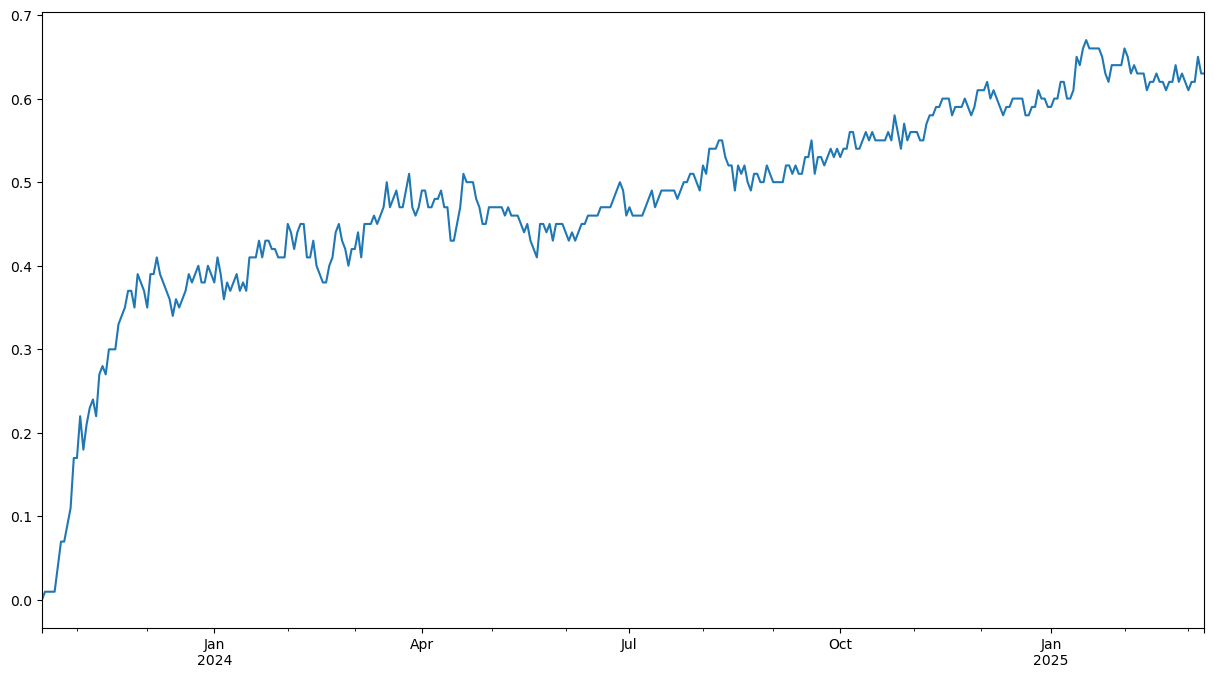

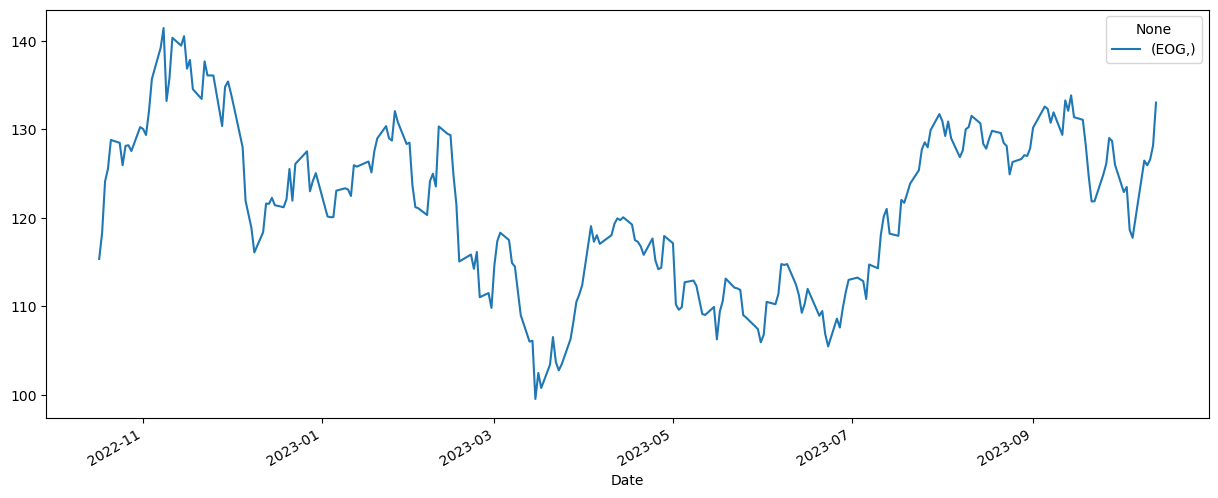

In [35]:
# Comparar cada escenario en cada fecha
TFE = precios_simulados_EOG>=umbral

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = TFE.sum(axis=1)/nscen

# Gráfico de probabilidad
prob.plot(figsize=(15, 8), legend=False)

#Grafico de los datos hasta el momento
precios_reales.plot(figsize=(15, 6))

Obtendremos los datos simulados de **Marathon Oil Corporation(MRO)**

In [36]:
#Calculamos media y desviación estandard
mu_MRO = ret['MRO'].mean()

std_MRO = ret['MRO'].std()

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\

<Axes: >

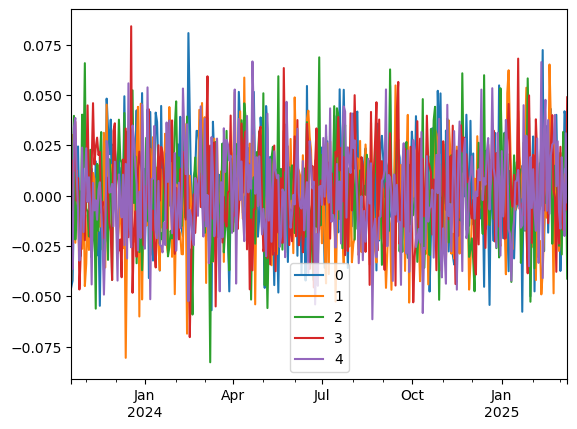

In [37]:
pd.DataFrame(std_MRO * np.random.randn(N,5) + mu_MRO, 
             index=pd.date_range('2023-10-17', periods=N, freq='B')).plot()

In [38]:
ndays = 365
nscen = 100
start_date = '2023-10-17'

rend_simu_MRO = sim_rend(mu_MRO, std_MRO, ndays, nscen, start_date)
#rend_simu_MRO

#rend_simu_MRO.iloc[:, 0].plot(figsize=(15,6), legend=False)

In [39]:
precios['MRO'][-1]

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\2691840052.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios['MRO'][-1]


28.06999969482422

In [40]:
precios_simulados_MRO = precios['MRO'][-1]*(1+rend_simu_MRO).cumprod(axis=0)
precios_simulados_MRO

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\4056721089.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios_simulados_MRO = precios['MRO'][-1]*(1+rend_simu_MRO).cumprod(axis=0)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2023-10-17,29.313143,28.598131,28.824302,27.895568,29.112503,28.520209,27.878102,28.077822,27.245684,27.101658,...,28.726221,27.782126,28.200342,28.017944,28.095145,27.126084,28.270220,28.338820,28.612692,27.829032
2023-10-18,28.690022,29.300568,28.132167,27.057432,29.662608,29.377616,27.424492,28.617344,25.656154,28.052419,...,28.012279,27.517564,28.624250,27.367910,27.382831,26.984199,29.714492,27.326240,29.423127,27.602561
2023-10-19,29.359840,29.235365,28.901749,28.655602,29.178540,30.136226,27.547928,29.866470,25.691730,28.284661,...,27.432252,28.684332,29.146503,27.901885,26.965019,27.294429,29.275626,27.688124,29.382444,27.973221
2023-10-20,30.302930,28.188949,29.551529,29.042298,30.123991,31.111483,27.615033,29.768504,24.984191,27.082730,...,27.151240,29.960851,29.530724,27.256681,26.408152,26.983587,28.281640,28.501676,29.984633,28.491777
2023-10-23,29.968669,28.944014,29.911834,29.253958,31.638897,31.388861,26.398836,28.569650,25.050173,27.471327,...,26.928827,30.185944,30.781221,27.322043,26.256999,26.676978,28.260639,28.863061,29.843545,28.398521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,37.505579,37.798831,18.287155,25.125472,26.802603,81.738829,31.343437,19.656351,29.770906,55.435927,...,24.532013,17.462027,19.338316,50.989412,22.079265,27.886285,37.074181,15.734817,19.287477,23.698472
2025-03-05,38.254440,37.663069,18.389931,25.552610,27.464792,82.548010,31.556690,20.831179,29.209731,54.830878,...,24.527412,17.526487,19.261811,53.251131,21.374696,28.030859,37.029582,15.018048,18.945578,24.070420
2025-03-06,40.590267,38.593352,18.385564,24.522716,27.271910,82.218822,30.829724,20.666228,30.538989,53.251984,...,24.614123,17.295030,19.360971,53.473638,22.060847,28.090056,38.058462,14.864424,18.350747,24.286070
2025-03-07,40.408730,38.850617,18.934694,24.706245,28.002372,82.698962,32.482812,20.381332,29.923129,53.274863,...,24.587357,16.932060,19.197447,53.446399,21.648317,28.806571,38.690091,15.254826,18.658216,24.112405


In [41]:
# Umbral de 110% del ultimo precio
umbral = (1.1)*(precios['MRO'][-1])

# Fechas
dates = precios_simulados_MRO.index

umbral

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\3815425957.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  umbral = (1.1)*(precios['MRO'][-1])


30.876999664306645

In [42]:
TFM = precios_simulados_MRO>=umbral

In [43]:
# Instrumento: 
names = ['MRO']

# Fechas de interés (inicio y fin): 
start = '2022-10-16'
end = '2023-10-16'

# Función DataReader
precios_reales = get_adj_closes(names, start, end)

[*********************100%%**********************]  1 of 1 completed


C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-pack

<Axes: xlabel='Date'>

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\ticker.py:218: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return [self(value, i) for i, value in enumerate(values)]


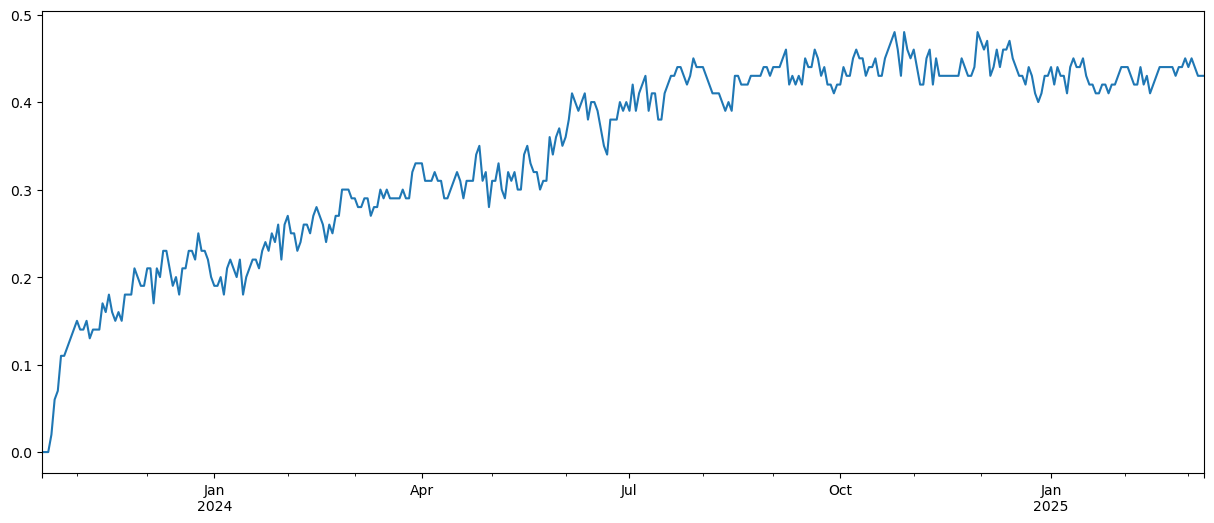

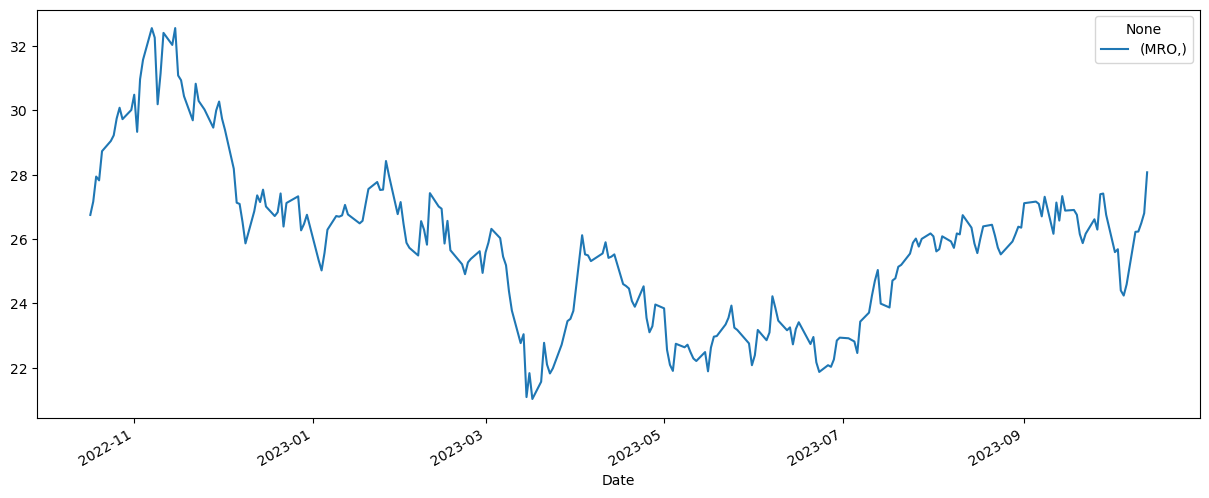

In [44]:
# Comparar cada escenario en cada fecha
TFM = precios_simulados_MRO>=umbral

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = TFM.sum(axis=1)/nscen

# Gráfico de probabilidad
prob.plot(figsize=(15, 6), legend=False)

#Grafico de los datos hasta el momento
precios_reales.plot(figsize=(15, 6))

Obtendremos los datos simulados de **Callon Petroleum Company (CPE)**

In [45]:
#Calculamos media y desviación estandard
mu_CPE = ret['CPE'].mean()

std_CPE = ret['CPE'].std()

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\

<Axes: >

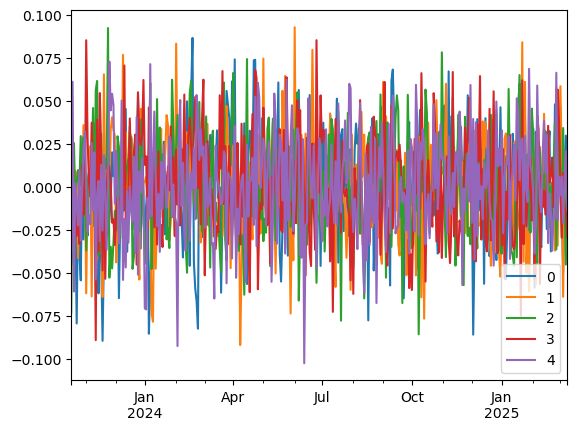

In [46]:
pd.DataFrame(std_CPE * np.random.randn(N,5) + mu_CPE, 
             index=pd.date_range('2023-10-17', periods=N, freq='B')).plot()

In [47]:
ndays = 365
nscen = 100
start_date = '2023-10-17'

rend_simu_CPE = sim_rend(mu_CPE, std_CPE, ndays, nscen, start_date)
#rend_simu_CPE

#rend_simu_CPE.iloc[:, 0].plot(figsize=(15,6), legend=False)

In [48]:
precios['CPE'][-1]

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\3419112208.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios['CPE'][-1]


38.38999938964844

In [49]:
precios_simulados_CPE = precios['CPE'][-1]*(1+rend_simu_CPE).cumprod(axis=0)
precios_simulados_CPE

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\3186556487.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios_simulados_CPE = precios['CPE'][-1]*(1+rend_simu_CPE).cumprod(axis=0)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2023-10-17,37.783182,39.328249,36.624126,37.128888,37.328768,39.081455,37.646273,37.688846,37.563222,38.637199,...,38.029111,39.095741,37.701798,36.629613,38.542784,36.299196,39.852796,38.084715,37.766493,39.337856
2023-10-18,34.793617,39.528851,36.077393,36.250156,38.931114,38.174901,37.926553,36.903144,35.534079,36.797724,...,37.515906,40.240842,38.875833,36.880985,38.049348,36.404869,38.575801,35.645744,37.878536,40.683488
2023-10-19,35.271194,40.599566,37.528582,36.838613,37.522339,37.790834,37.198297,36.918933,34.758306,37.863924,...,37.751950,40.736663,36.033708,38.109467,36.958648,37.381165,37.060335,35.218361,35.572019,41.794787
2023-10-20,33.947087,40.871835,37.492281,35.534579,38.330941,37.351993,36.485391,37.777230,34.024901,37.805643,...,40.314022,44.149970,36.723762,38.084660,36.703184,37.142640,37.935626,33.676180,36.905635,41.859544
2023-10-23,31.884231,42.172024,37.419395,37.148806,39.584333,37.583779,34.793521,37.824915,34.259003,40.183470,...,41.909742,41.203050,36.307823,37.552273,39.121162,37.529827,36.174551,32.901781,37.574879,43.301583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,17.486652,43.119453,48.860402,70.168322,36.657387,54.860945,19.079411,15.418337,23.604178,26.695060,...,16.642462,40.563023,29.095154,25.584115,31.092381,16.530835,12.203899,79.956090,50.140822,67.153672
2025-03-05,17.608902,42.441492,47.094280,70.184377,38.550469,55.148193,19.094263,15.168945,25.632857,27.119709,...,17.160493,39.908454,30.557878,25.567429,31.904752,16.455937,12.494287,81.314324,46.868050,67.140329
2025-03-06,16.609538,40.978735,44.148166,72.238842,39.762483,55.414670,18.399646,15.568186,24.829498,27.516651,...,17.206278,38.069718,30.399861,25.773858,31.577070,16.645420,12.353453,84.690052,47.268885,64.508715
2025-03-07,16.689142,40.566535,44.529892,71.378884,40.740594,56.091054,19.048081,14.991599,25.152120,28.295455,...,17.655012,38.551985,30.845826,26.393002,30.380140,17.266711,12.423007,80.684964,46.313651,63.390809


In [50]:
# Umbral de 110% del ultimo precio
umbral = (1.1)*(precios['CPE'][-1])

# Fechas
dates = precios_simulados_CPE.index

umbral

C:\Users\reyes\AppData\Local\Temp\ipykernel_5200\1317015460.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  umbral = (1.1)*(precios['CPE'][-1])


42.228999328613284

In [51]:
TFC = precios_simulados_CPE>=umbral

In [52]:
# Instrumento: 
names = ['CPE']

# Fechas de interés (inicio y fin): 
start = '2022-10-16'
end = '2023-10-16'

# Función DataReader
precios_reales = get_adj_closes(names, start, end)

[*********************100%%**********************]  1 of 1 completed


C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-pack

<Axes: xlabel='Date'>

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\ticker.py:218: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return [self(value, i) for i, value in enumerate(values)]


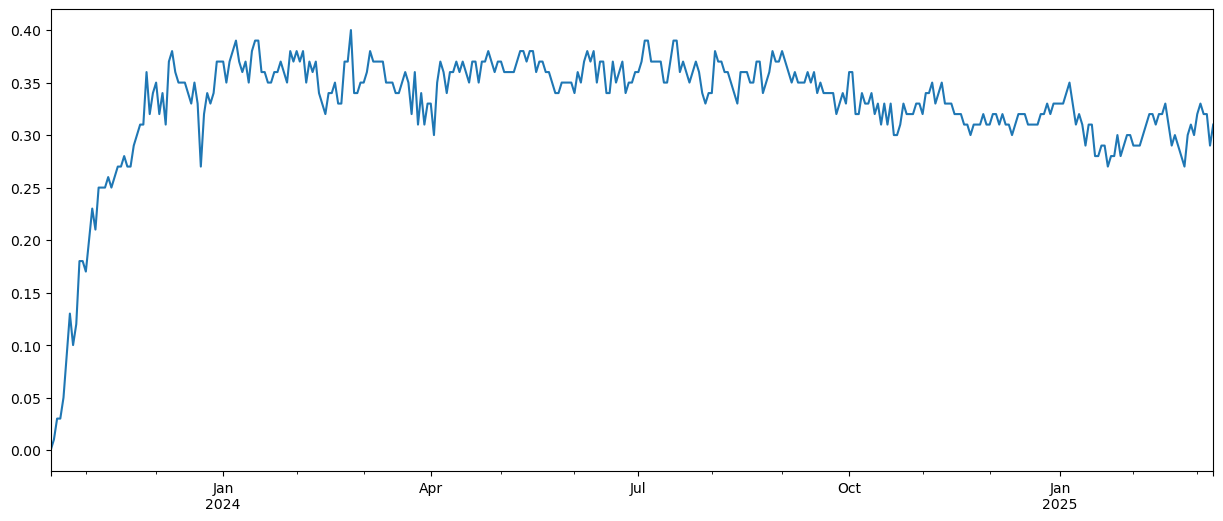

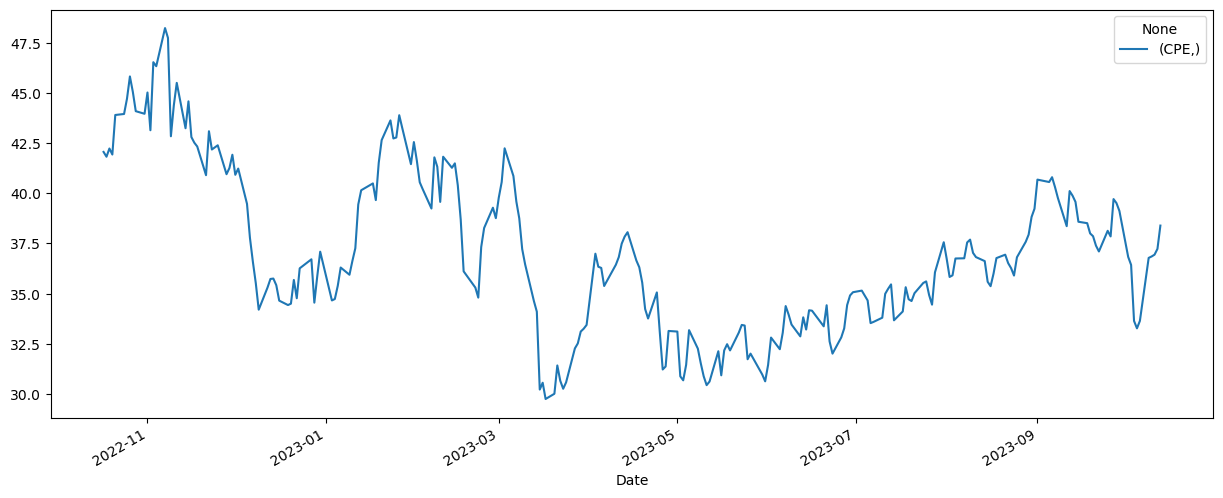

In [54]:
# Comparar cada escenario en cada fecha
TFC = precios_simulados_CPE>=umbral

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = TFC.sum(axis=1)/nscen

# Gráfico de probabilidad
prob.plot(figsize=(15, 6), legend=False)

#Grafico de los datos hasta el momento
precios_reales.plot(figsize=(15, 6))

C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.locator()
C:\Users\reyes\anaconda3\Lib\site-pack

<Axes: >

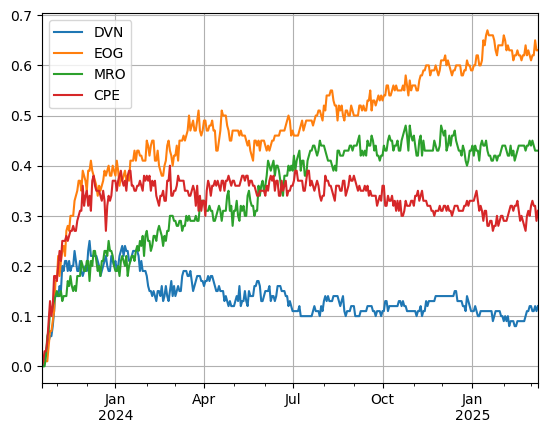

In [55]:
# Probabilidad de que el precio supere el umbral
M_DVN = TFD.mean(axis=1)
M_EOG = TFE.mean(axis=1)
M_MRO = TFM.mean(axis=1)
M_CPE = TFC.mean(axis=1)
M_DVN.plot(label='DVN', legend=2)
M_EOG.plot(label='EOG', legend=2)
M_MRO.plot(label='MRO', legend=2)
M_CPE.plot(grid=True, label='CPE', legend=2)

### 1.7 Conclusiones.
> En conclusión los umbrales que estan calculados con 110% del ultimo precio son los siguientes. DVN(51.4250), EOG(146.3164), MRO(30.8769, Y CPE(42.2289) Por lo cual podemos decir que EOg es la compañia que nos daría el mejor resultado possible sin embargo, en un punto de vista más conservador creo que DVN es una compañia sin tanto riesgo que te daría un excelente unmbral además de haber tenido ganancias más estables.

### 1.8 Referencias.
> https://finance.yahoo.com/

### 2.1 (Proyecto.
> Debe describir el trabajo.

### 2.2 Introducción
> Debe contextualizar y describir el problema que se va a trabajar.


### 2.3 Objetivos.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.
